Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [2]:
file = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(file)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [7]:
df.cntry.value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [8]:
# Drop Denmark, too small of a sample
df = df[df.cntry != 'DE']

In [9]:
df.cntry.value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
Name: cntry, dtype: int64

In [10]:
df.year = np.where(df.year == 6, 2012, 2014)

In [11]:
df.year.value_counts()

2014    4062
2012    4058
Name: year, dtype: int64

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

### Spain trust comparison by year

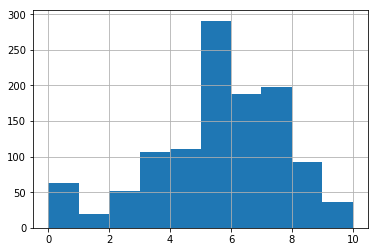

In [12]:
df[df.cntry == 'ES'][df.year == 2012].ppltrst.hist()
plt.show()

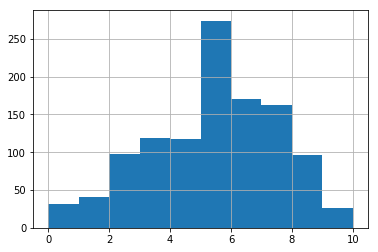

In [13]:
df[df.cntry == 'ES'][df.year == 2014].ppltrst.hist()
plt.show()

In [14]:
print('Spain 2012 trust rating average: {}'.format(np.mean(df[df.cntry == 'ES'][df.year == 2012].ppltrst)))
print('Spain 2014 trust rating average: {}'.format(np.mean(df[df.cntry == 'ES'][df.year == 2014].ppltrst)))

stats.ttest_ind(
    df[df.cntry == 'ES'][df.year == 2012].ppltrst,
    df[df.cntry == 'ES'][df.year == 2014].ppltrst)

Spain 2012 trust rating average: 5.127806563039724
Spain 2014 trust rating average: 4.940035273368607


Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)

The p-value is less than 0.05, so the drop in trust represents a meaningful difference.

### Sweden trust comparison by year

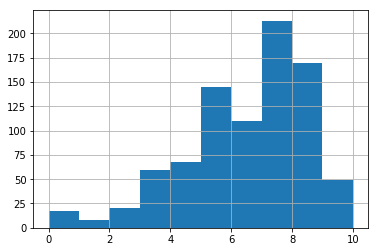

In [15]:
df[df.cntry == 'SE'][df.year == 2012].ppltrst.hist()
plt.show()

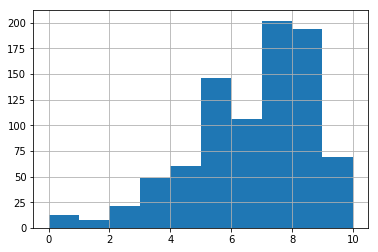

In [16]:
df[df.cntry == 'SE'][df.year == 2014].ppltrst.hist()
plt.show()

In [17]:
print('Sweden 2012 trust rating average: {}'.format(np.mean(df[df.cntry == 'SE'][df.year == 2012].ppltrst)))
print('Sweden 2014 trust rating average: {}'.format(np.mean(df[df.cntry == 'SE'][df.year == 2014].ppltrst)))

# Not normal enough
stats.kruskal(
    df[df.cntry == 'SE'][df.year == 2012].ppltrst,
    df[df.cntry == 'SE'][df.year == 2014].ppltrst)

Sweden 2012 trust rating average: 6.043073341094296
Sweden 2014 trust rating average: 6.239907727797001


KruskalResult(statistic=4.486790845114948, pvalue=0.03415774143761488)

The p-value is less than 0.05, so the drop in trust represents a meaningful difference.

### Switzerland trust comparison by year

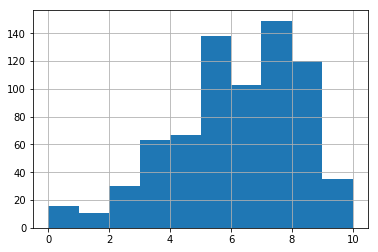

In [18]:
df[df.cntry == 'CH'][df.year == 2012].ppltrst.hist()
plt.show()

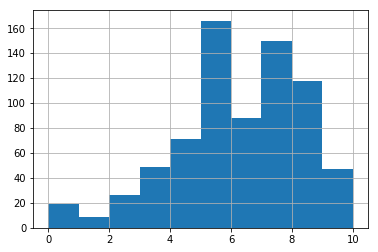

In [19]:
df[df.cntry == 'CH'][df.year == 2014].ppltrst.hist()
plt.show()

In [20]:
print('Switzerland 2012 trust rating average: {}'.format(np.mean(df[df.cntry == 'CH'][df.year == 2012].ppltrst)))
print('Switzerland 2014 trust rating average: {}'.format(np.mean(df[df.cntry == 'CH'][df.year == 2014].ppltrst)))

# Not normal enough
stats.kruskal(
    df[df.cntry == 'CH'][df.year == 2012].ppltrst,
    df[df.cntry == 'CH'][df.year == 2014].ppltrst)

Switzerland 2012 trust rating average: 5.685792349726776
Switzerland 2014 trust rating average: 5.764468371467026


KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)

There is on meaningful difference in trust rating in Switzerland as p-value represents a 57% chance of seeing this data with no meaningful difference.

### Norway trust comparison by year

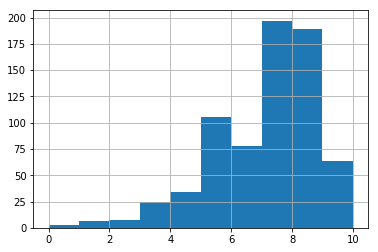

In [21]:
df[df.cntry == 'NO'][df.year == 2012].ppltrst.hist()
plt.show()

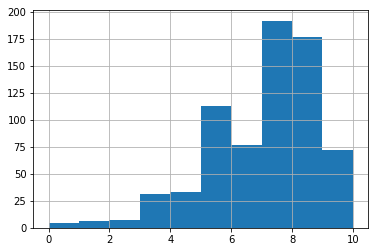

In [22]:
df[df.cntry == 'NO'][df.year == 2014].ppltrst.hist()
plt.show()

In [23]:
print('Norway 2012 trust rating average: {}'.format(np.mean(df[df.cntry == 'NO'][df.year == 2012].ppltrst)))
print('Norway 2014 trust rating average: {}'.format(np.mean(df[df.cntry == 'NO'][df.year == 2014].ppltrst)))

# Not normal enough
stats.kruskal(
    df[df.cntry == 'NO'][df.year == 2012].ppltrst,
    df[df.cntry == 'NO'][df.year == 2014].ppltrst)

Norway 2012 trust rating average: 6.648305084745763
Norway 2014 trust rating average: 6.599719101123595


KruskalResult(statistic=0.20681671394808315, pvalue=0.649273954856751)

There is on meaningful difference in trust rating in Norway as p-value represents a 65% chance of seeing this data with no meaningful difference.

### Czech Republic trust comparison by year

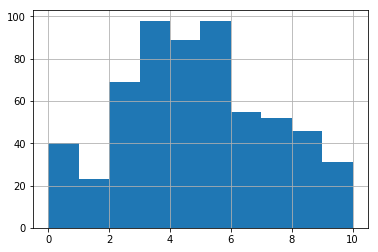

In [24]:
df[df.cntry == 'CZ'][df.year == 2012].ppltrst.hist()
plt.show()

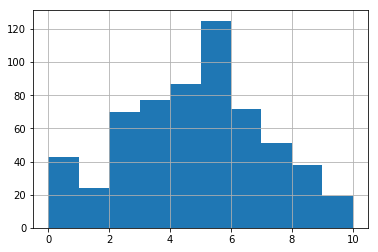

In [25]:
df[df.cntry == 'CZ'][df.year == 2014].ppltrst.hist()
plt.show()

In [26]:
print('Czech Republic 2012 trust rating average: {}'.format(np.mean(df[df.cntry == 'CZ'][df.year == 2012].ppltrst)))
print('Czech Republic 2014 trust rating average: {}'.format(np.mean(df[df.cntry == 'CZ'][df.year == 2014].ppltrst)))

# normal enough
stats.ttest_ind(
    df[df.cntry == 'CZ'][df.year == 2012].ppltrst,
    df[df.cntry == 'CZ'][df.year == 2014].ppltrst)

Czech Republic 2012 trust rating average: 4.402662229617304
Czech Republic 2014 trust rating average: 4.356435643564357


Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)

There is a 73% chance of getting this data with no meaningful difference in the data according to our p-value, so we assume there is no meaningful difference

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

### Spain happiness comparison by year

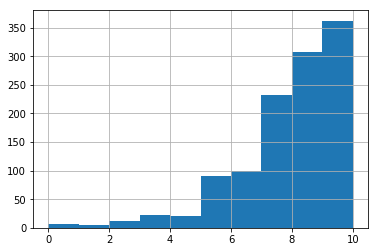

In [27]:
df[df.cntry == 'ES'][df.year == 2012].happy.hist()
plt.show()

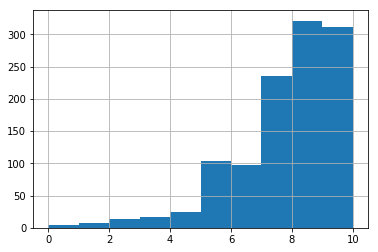

In [28]:
df[df.cntry == 'ES'][df.year == 2014].happy.hist()
plt.show()

In [29]:
print('Spain 2012 happiness rating average: {}'.format(np.mean(df[df.cntry == 'ES'][df.year == 2012].happy)))
print('Spain 2014 happiness rating average: {}'.format(np.mean(df[df.cntry == 'ES'][df.year == 2014].happy)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'ES'][df.year == 2012].happy,
    df[df.cntry == 'ES'][df.year == 2014].happy)

Spain 2012 happiness rating average: 7.557858376511226
Spain 2014 happiness rating average: 7.450617283950617


KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)

If there were not a meaningful difference in the data, there is an 8% chance of seeing the data we have. That is not a small enough chance, so we reject that there is a meaningful difference in happiness in Spain.

### Sweden happiness comparison by year

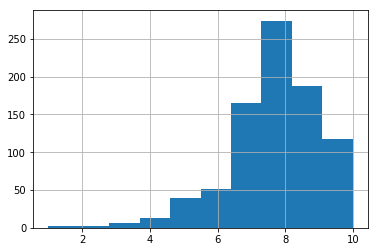

In [30]:
df[df.cntry == 'SE'][df.year == 2012].happy.hist()
plt.show()

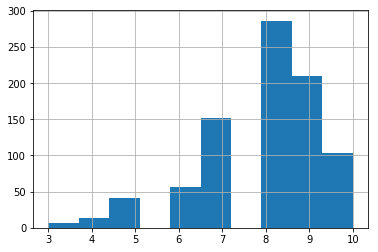

In [31]:
df[df.cntry == 'SE'][df.year == 2014].happy.hist()
plt.show()

In [32]:
print('Sweden 2012 happiness rating average: {}'.format(np.mean(df[df.cntry == 'SE'][df.year == 2012].happy)))
print('Sweden 2014 happiness rating average: {}'.format(np.mean(df[df.cntry == 'SE'][df.year == 2014].happy)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'SE'][df.year == 2012].happy,
    df[df.cntry == 'SE'][df.year == 2014].happy)

Sweden 2012 happiness rating average: 7.90104772991851
Sweden 2014 happiness rating average: 7.9388696655132645


KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)

There is not a significant difference in happiness according to the p-value

### Switzerland happiness comparison by year

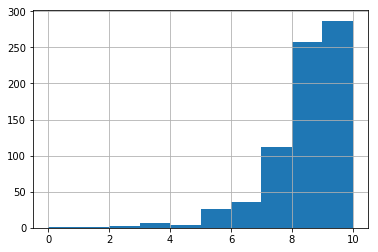

In [33]:
df[df.cntry == 'CH'][df.year == 2012].happy.hist()
plt.show()

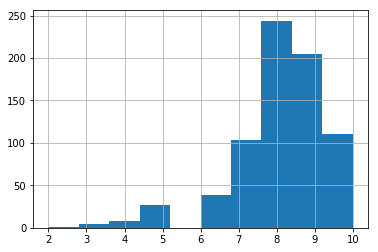

In [34]:
df[df.cntry == 'CH'][df.year == 2014].happy.hist()
plt.show()

In [35]:
print('Switzerland 2012 happiness rating average: {}'.format(np.mean(df[df.cntry == 'CH'][df.year == 2012].happy)))
print('Switzerland 2014 happiness rating average: {}'.format(np.mean(df[df.cntry == 'CH'][df.year == 2014].happy)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'CH'][df.year == 2012].happy,
    df[df.cntry == 'CH'][df.year == 2014].happy)

Switzerland 2012 happiness rating average: 8.083333333333334
Switzerland 2014 happiness rating average: 8.142664872139973


KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)

There is again no meaningful difference based on the p-value

### Norway happiness comparison by year

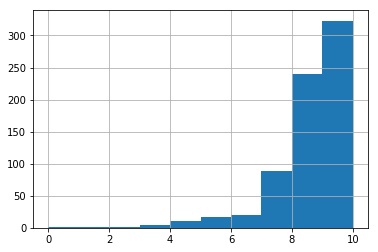

In [36]:
df[df.cntry == 'NO'][df.year == 2012].happy.hist()
plt.show()

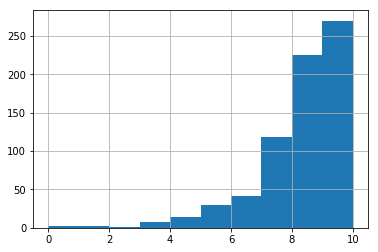

In [37]:
df[df.cntry == 'NO'][df.year == 2014].happy.hist()
plt.show()

In [38]:
print('Norway 2012 happiness rating average: {}'.format(np.mean(df[df.cntry == 'NO'][df.year == 2012].happy)))
print('Norway 2014 happiness rating average: {}'.format(np.mean(df[df.cntry == 'NO'][df.year == 2014].happy)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'NO'][df.year == 2012].happy,
    df[df.cntry == 'NO'][df.year == 2014].happy)

Norway 2012 happiness rating average: 8.252824858757062
Norway 2014 happiness rating average: 7.919943820224719


KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)

P-values shows no differnce in happiness.

### Czech Republic happiness comparison by year

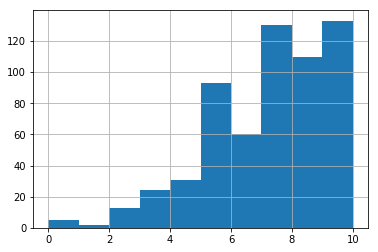

In [39]:
df[df.cntry == 'CZ'][df.year == 2012].happy.hist()
plt.show()

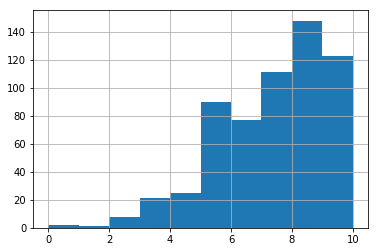

In [40]:
df[df.cntry == 'CZ'][df.year == 2014].happy.hist()
plt.show()

In [41]:
print('Czech Republic 2012 happiness rating average: {}'.format(np.mean(df[df.cntry == 'CZ'][df.year == 2012].happy)))
print('Czech Republic 2014 happiness rating average: {}'.format(np.mean(df[df.cntry == 'CZ'][df.year == 2014].happy)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'CZ'][df.year == 2012].happy,
    df[df.cntry == 'CZ'][df.year == 2014].happy)

Czech Republic 2012 happiness rating average: 6.790349417637271
Czech Republic 2014 happiness rating average: 6.922442244224422


KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)

P-value shows no difference.

# Who reported watching more TV in 2012, men or women?

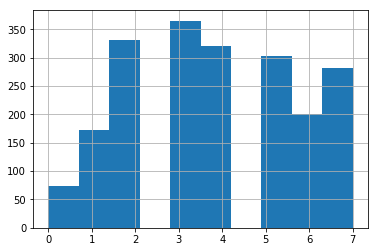

In [42]:
df[df.gndr == 1][df.year == 2012].tvtot.hist()
plt.show()

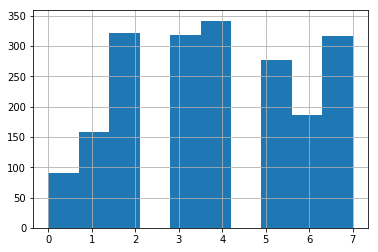

In [43]:
df[df.gndr == 2][df.year == 2012].tvtot.hist()
plt.show()

In [44]:
print('Men tv watching average in 2012: {}'.format(np.mean(df[df.gndr == 1][df.year == 2012].tvtot)))
print('Women tv watching average in 2012: {}'.format(np.mean(df[df.gndr == 2][df.year == 2012].tvtot)))

# Not normal data
stats.kruskal(
    df[df.gndr == 1][df.year == 2012].tvtot,
    df[df.gndr == 2][df.year == 2012].tvtot)

Men tv watching average in 2012: 3.85595703125
Women tv watching average in 2012: 3.9019900497512436


KruskalResult(statistic=0.610899975771257, pvalue=0.4344491544705673)

There is not a statistically significant difference in tv watching habits between men and women in 2012 because the p-value is so high at 0.43, representing a 43% chance that you would see the data we have if there were no meaningful difference.

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

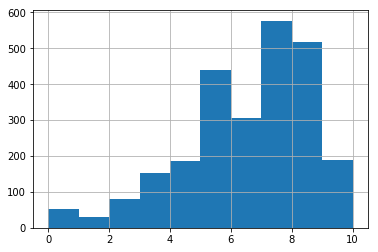

In [45]:
df[df.partner == 1][df.year == 2012].pplfair.hist()
plt.show()

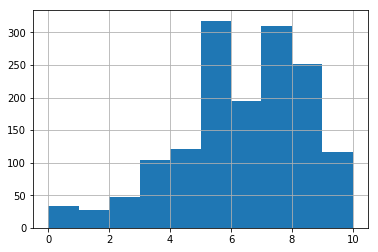

In [46]:
df[df.partner == 2][df.year == 2012].pplfair.hist()
plt.show()

In [47]:
print('Living w/partner- fairness belief average in 2012: {}'.format(np.mean(df[df.partner == 1][df.year == 2012].pplfair)))
print('Living alone- fairiness belief average in 2012: {}'.format(np.mean(df[df.partner == 2][df.year == 2012].pplfair)))

# Not normal data
stats.kruskal(
    df[df.partner == 1][df.year == 2012].pplfair,
    df[df.partner == 2][df.year == 2012].pplfair)

Living w/partner- fairness belief average in 2012: 6.073007103393843
Living alone- fairiness belief average in 2012: 5.870734908136483


KruskalResult(statistic=11.178636107686811, pvalue=0.0008274457537428282)

There is a statistically significant difference in the belief that people are fair between those who live with a partner and those who don't in the year 2012 based on our p-value being only 0.0008. We can accept that there is a meaningful difference, and the means show that those who live with a partner believe more that people are fair.

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

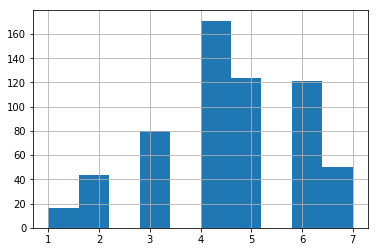

In [48]:
df[df.cntry == 'CZ'][df.year == 2014].sclmeet.hist()
plt.show()

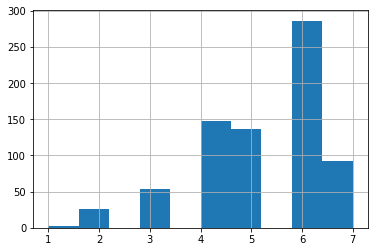

In [49]:
df[df.cntry == 'CH'][df.year == 2014].sclmeet.hist()
plt.show()

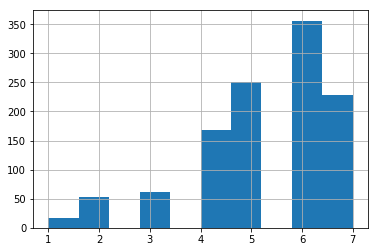

In [50]:
df[df.cntry == 'ES'][df.year == 2014].sclmeet.hist()
plt.show()

In [51]:
print('Czech Republic social meetup average in 2014: {}'.format(np.mean(df[df.cntry == 'CZ'][df.year == 2014].sclmeet)))
print('Switzerland social meetup average in 2014: {}'.format(np.mean(df[df.cntry == 'CH'][df.year == 2014].sclmeet)))
print('Spain social meetup average in 2014: {}'.format(np.mean(df[df.cntry == 'ES'][df.year == 2014].sclmeet)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'CZ'][df.year == 2014].sclmeet,
    df[df.cntry == 'CH'][df.year == 2014].sclmeet,
    df[df.cntry == 'ES'][df.year == 2014].sclmeet)

Czech Republic social meetup average in 2014: 4.4950495049504955
Switzerland social meetup average in 2014: 5.174966352624495
Spain social meetup average in 2014: 5.263668430335097


KruskalResult(statistic=126.52408817790707, pvalue=3.354620049166388e-28)

The p-value is incredibly high, so there is not statisctally significant difference in how often people socially meetup in the countries of Switzerland, Spain, and the Czech Republic.

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

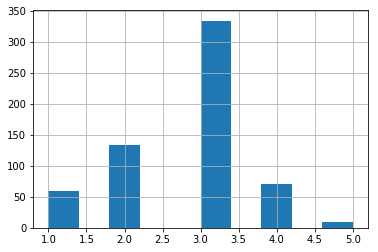

In [52]:
df[df.cntry == 'CZ'][df.year == 2014].sclact.hist()
plt.show()

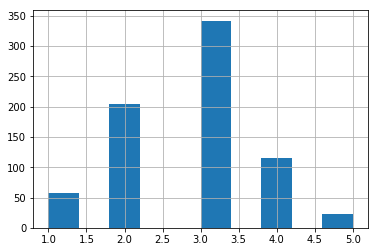

In [53]:
df[df.cntry == 'CH'][df.year == 2014].sclact.hist()
plt.show()

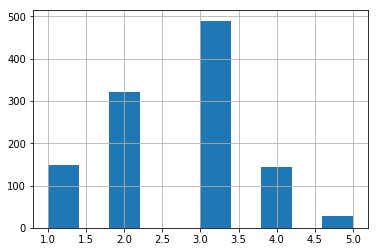

In [54]:
df[df.cntry == 'ES'][df.year == 2014].sclact.hist()
plt.show()

In [55]:
print('Czech Republic social activites average in 2014: {}'.format(np.mean(df[df.cntry == 'CZ'][df.year == 2014].sclact)))
print('Switzerland social activities average in 2014: {}'.format(np.mean(df[df.cntry == 'CH'][df.year == 2014].sclact)))
print('Spain social activities average in 2014: {}'.format(np.mean(df[df.cntry == 'ES'][df.year == 2014].sclact)))

# Not normal data
stats.kruskal(
    df[df.cntry == 'CZ'][df.year == 2014].sclact,
    df[df.cntry == 'CH'][df.year == 2014].sclact,
    df[df.cntry == 'ES'][df.year == 2014].sclact)

Czech Republic social activites average in 2014: 2.7293729372937294
Switzerland social activities average in 2014: 2.784656796769852
Spain social activities average in 2014: 2.631393298059965


KruskalResult(statistic=13.27984643390856, pvalue=0.0013071276052219855)

With a p-value of 0.001, we can accept that there is a meaningful difference, and by looking at the means I would conclude that Spain has a statistically significant smaller average of participation in social activities.